In [ ]:
import os

from ultralytics import YOLO
import cv2




video_path = 'test.mp4'
video_path_out = '{}_out.mp4'.format(video_path)

cap = cv2.VideoCapture(video_path)
ret, frame = cap.read()
H, W, _ = frame.shape
out = cv2.VideoWriter(video_path_out, cv2.VideoWriter_fourcc(*'MP4V'), int(cap.get(cv2.CAP_PROP_FPS)), (W, H))

model_path = os.path.join('.', 'runs', 'detect', 'train2', 'weights', 'best.pt')

# Load a model
model = YOLO(model_path)  # load a custom model

threshold = 0.5

while ret:

    results = model(frame)[0]

    for result in results.boxes.data.tolist():
        x1, y1, x2, y2, score, class_id = result

        if score > threshold:
            if results.names[int(class_id)].upper()=='NUT':
                color = (0, 0, 255)
            else:
                color = (0, 255, 0)
            cv2.rectangle(frame, (int(x1), int(y1)), (int(x2), int(y2)), color, 4)
            cv2.putText(frame, results.names[int(class_id)].upper() + str((int(x1), int(y1))), (int(x1), int(y1 - 10)),
                        cv2.FONT_HERSHEY_SIMPLEX, 1.3, color, 3, cv2.LINE_AA)

    out.write(frame)
    ret, frame = cap.read()

cap.release()
out.release()
cv2.destroyAllWindows()

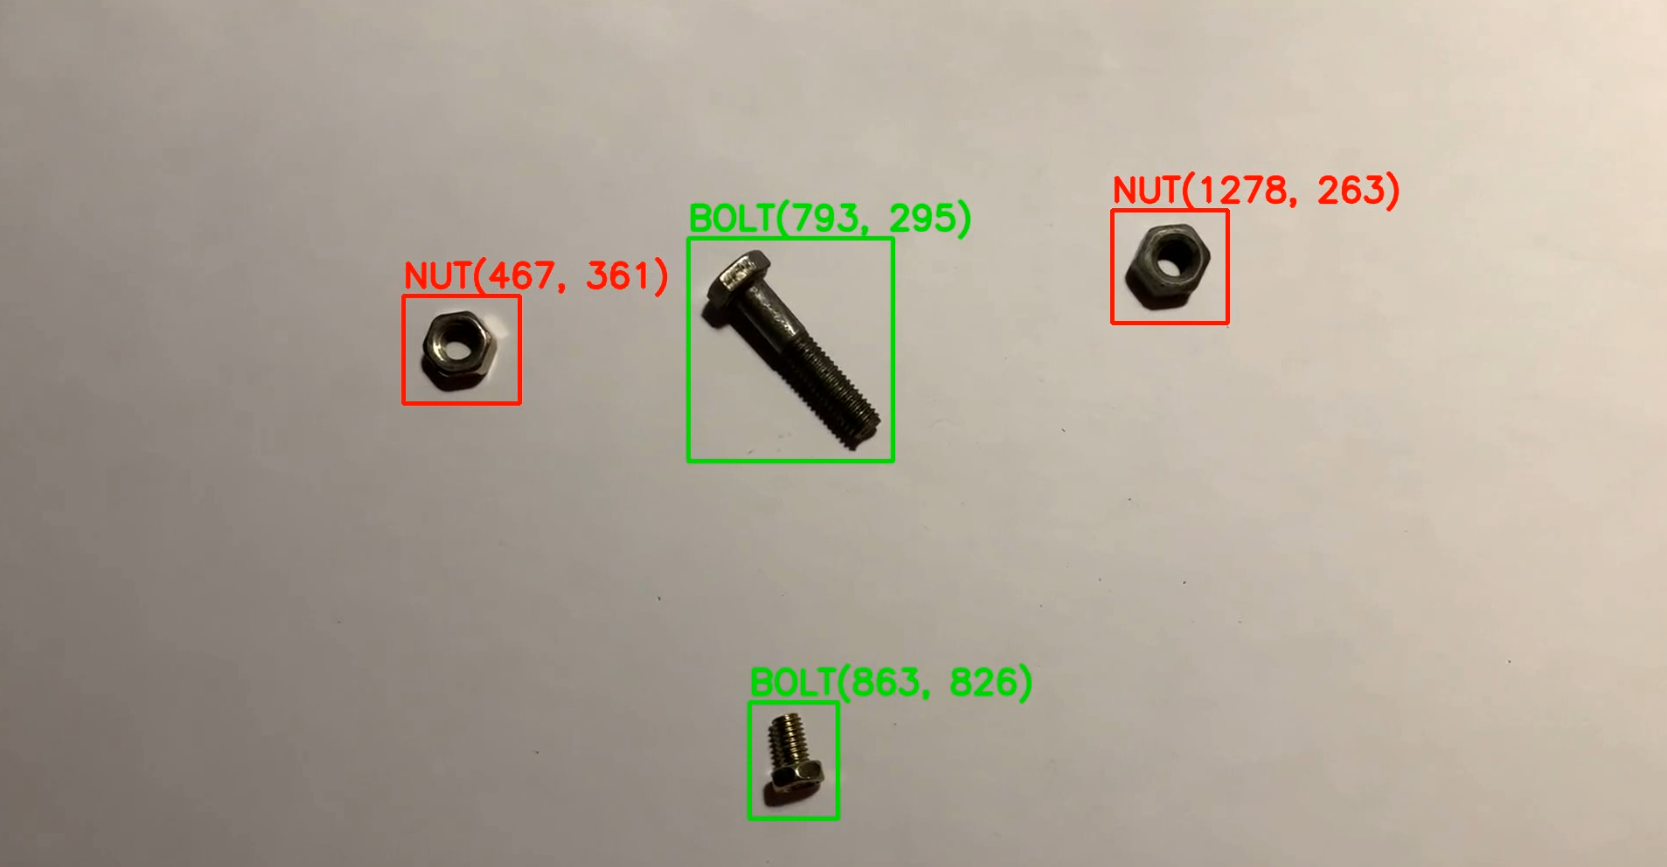

In [1]:
from PIL import Image
test_img = Image.open('fasteners_test.png')

display(test_img)